# Data Exploration

### Business Case
    - Gain further insight on sample population's of Ratings, Movie's and Users.
### Info on df: 
    - Rows = 100,836 Ratings(rows)  Total Ratings, 
    - Columns = movieId, title, genres, 'userId', 'rating'
    - Titles = 9,717
    - Genres = 951
    - UserId = 690
    - Rating = count= 100836.000000, mean= 3.501557, std= 1.042529, min= 0.500000, 
    25%= 3.000000, 50%= 3.500000, 75%= 4.000000,
    max= 5.000000
    
### Summary of Pandas Profiling Report
    - No major warnings

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from pandas_profiling import ProfileReport
from dataprep.eda import *


NumExpr defaulting to 4 threads.


In [8]:
df = pd.read_csv(' .. df_movie_ratings.csv')

FileNotFoundError: [Errno 2] File  .. df_movie_ratings.csv does not exist: ' .. df_movie_ratings.csv'

In [22]:
df['movieId'].shape

(100836,)

In [16]:
df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating'], dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


In [8]:
df['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [18]:
df['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [4]:
plot(df)

In [11]:
df.desc()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


## Inspect dataset with Pandas Profiler

In [12]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()
profile.to_notebook_iframe()

/Users/rashidbaset/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Deleteing timestamp (movie duration) because it's irrelevent.

In [15]:
df.drop(columns='timestamp', inplace= True)

### Pandas Profiling Summary

Distinct count of features:  

- Titles: '9,719'
- Genres: '951'  
- User Ids: '610' 
- Rating: '0.5-5.0' 
- Correlation: ?

In [ ]:
### UserID 

Some userIds have upwards of '2500' ratings while the minimum amount of  

In [51]:
df['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64

In [48]:
df.loc[df['userId'] == 414].count()

movieId      2698
title        2698
genres       2698
userId       2698
rating       2698
timestamp    2698
dtype: int64

In [23]:
df.genres.value_counts()

Comedy                               7196
Drama                                6291
Comedy|Romance                       3967
Comedy|Drama|Romance                 3000
Comedy|Drama                         2851
                                     ... 
Comedy|Documentary|Romance              1
Comedy|Crime|Fantasy                    1
Adventure|Fantasy|Musical|Romance       1
Adventure|Children|Comedy|Sci-Fi        1
Fantasy|Mystery|Romance|Thriller        1
Name: genres, Length: 951, dtype: int64

In [ ]:
df['rating']

In [ ]:
df.groupby(['YEAR', 'SEASON'])

## Ratings Distribution

Note: Add percent to each bar, make bar wider and include percent sign

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

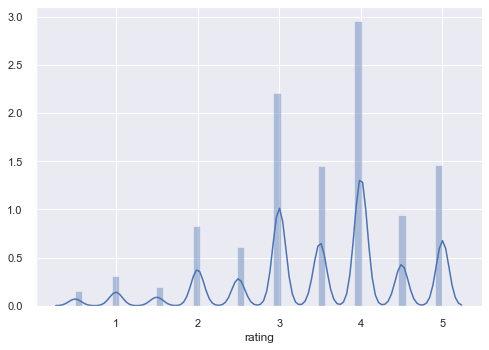

In [15]:
import seaborn as sns, numpy as np

sns.set(); 
x = df['rating']
ax = sns.distplot(x)

plt.savefig('plot.png')

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

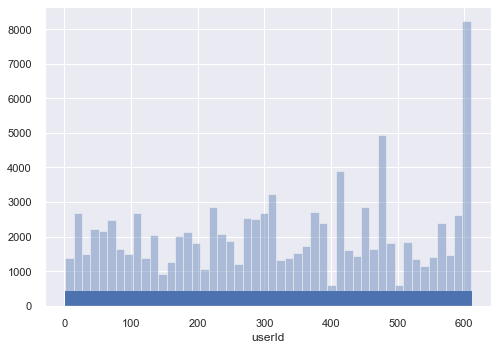

In [16]:
x = df['userId']
sns.distplot(x, kde=False, rug=True);

plt.savefig('plot2.png')

In [23]:
df2 = df.groupby('userId')['rating'].count().reset_index().sort_values('rating')

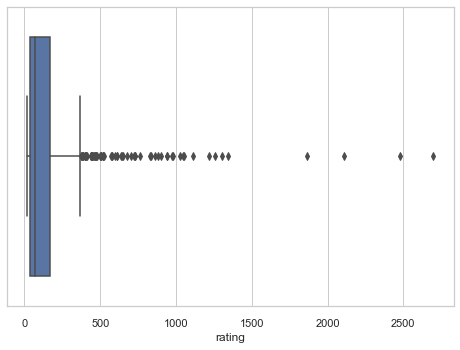

In [24]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df2['rating'])

plt.savefig('plot3.png')

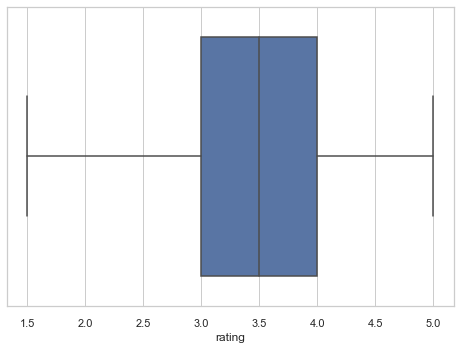

In [19]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df['rating'], showfliers = False)

plt.savefig('plot4.png')

In [54]:
df2.describe()

userId       rating
count  610.000000   610.000000
mean   305.500000   165.304918
std    176.236111   269.480584
min      1.000000    20.000000
25%    153.250000    35.000000
50%    305.500000    70.500000
75%    457.750000   168.000000
max    610.000000  2698.000000

In [9]:
df.groupby(['userId', 'rating']).sum().reset_index()

userId  rating   movieId     timestamp
0          1     1.0      3176     964983504
1          1     2.0     10816    4824914396
2          1     3.0     34670   25089544953
3          1     4.0    145998   73339380646
4          1     5.0    235608  119657828664
...      ...     ...       ...           ...
3971     610     3.0  11986578  342914875786
3972     610     3.5  18069525  469528414652
3973     610     4.0  15673471  426176496517
3974     610     4.5   6873298  220238369126
3975     610     5.0   6268235  267062149861

[3976 rows x 4 columns]